## Housing Price Regression Model Kaggle Competiton (gradient boosting, random forest)

##### Installing Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

##### Loading Data set

In [3]:
train= pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test= pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- There are 1460 rows and 81 columns
- There are columns with large number of null entries like PoolQC, MiscFeature
- The columns have Three types of datatypes: float64(3), int64(35), object(43)

In [6]:
pd.set_option('display.max_columns', None)
train.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
train.shape


(1460, 81)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- There are 1459 rows and 80 columns
- There are columns with large number of null entries like PoolQC, MiscFeature etc
- The columns have Three types of datatypes:  float64(11), int64(26), object(43)

In [9]:
pd.set_option('display.max_columns', None)
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [10]:
test.shape

(1459, 80)

Total Rows:  1460


<AxesSubplot:xlabel='columns', ylabel='No. of missing values'>

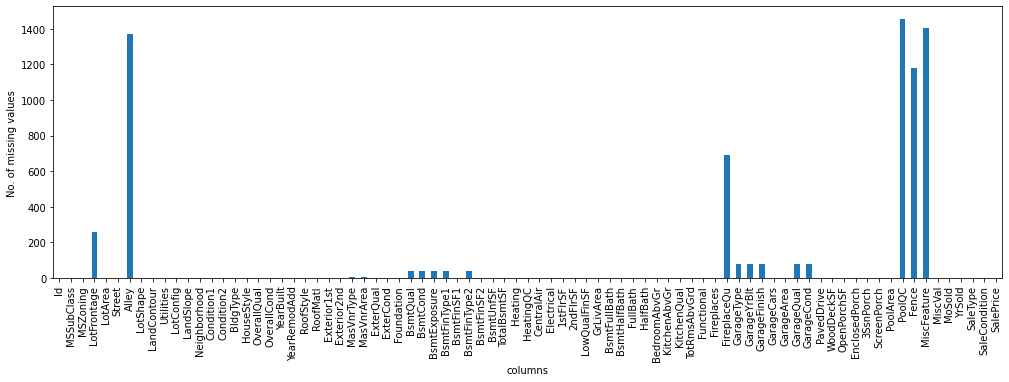

In [11]:
nan_train= train.isnull().sum()

print("Total Rows: ",train.shape[0])
plt.figure(figsize=(17,5))
plt.xlabel("columns")
plt.ylabel("No. of missing values")

nan_train.plot.bar()


In [12]:
train_nan_per = round(train.isnull().mean()*100,2).sort_values(ascending= False)[ round(train.isnull().mean()*100,2) > 0 ]
train_nan_per

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

* 19 features have missing values, out of which 5 features have more than 45% missing values.

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(133.44000000000005, 0.5, 'Features')

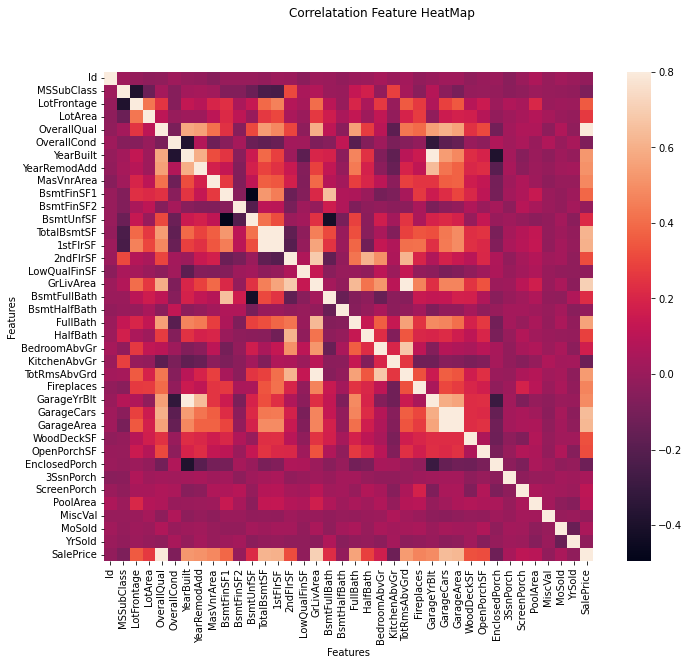

In [14]:
#correlation matrix
corr_mat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

Text(71.5, 0.5, 'Features')

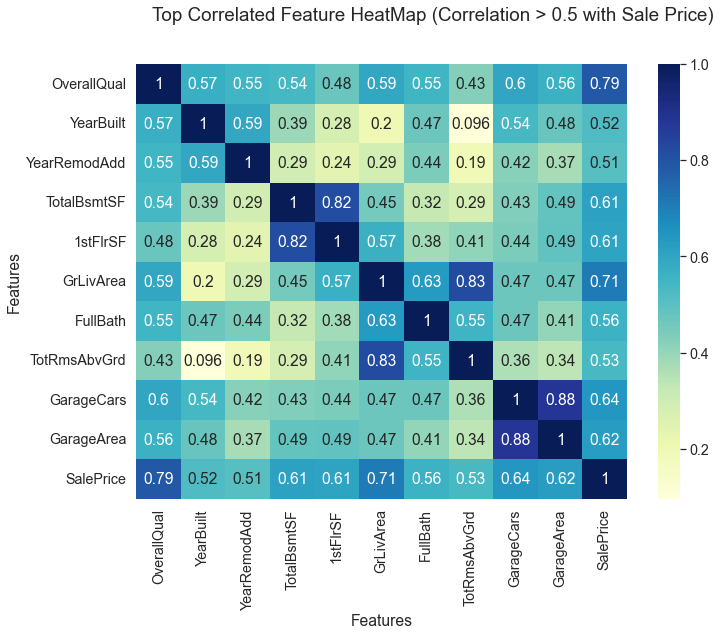

In [15]:
# most correlated features
corr_mat = train.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

- OverallQual and GrLivArea seem to be the most correlated to SalePrice

In [16]:
print("Correlation Values")

corr = train.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

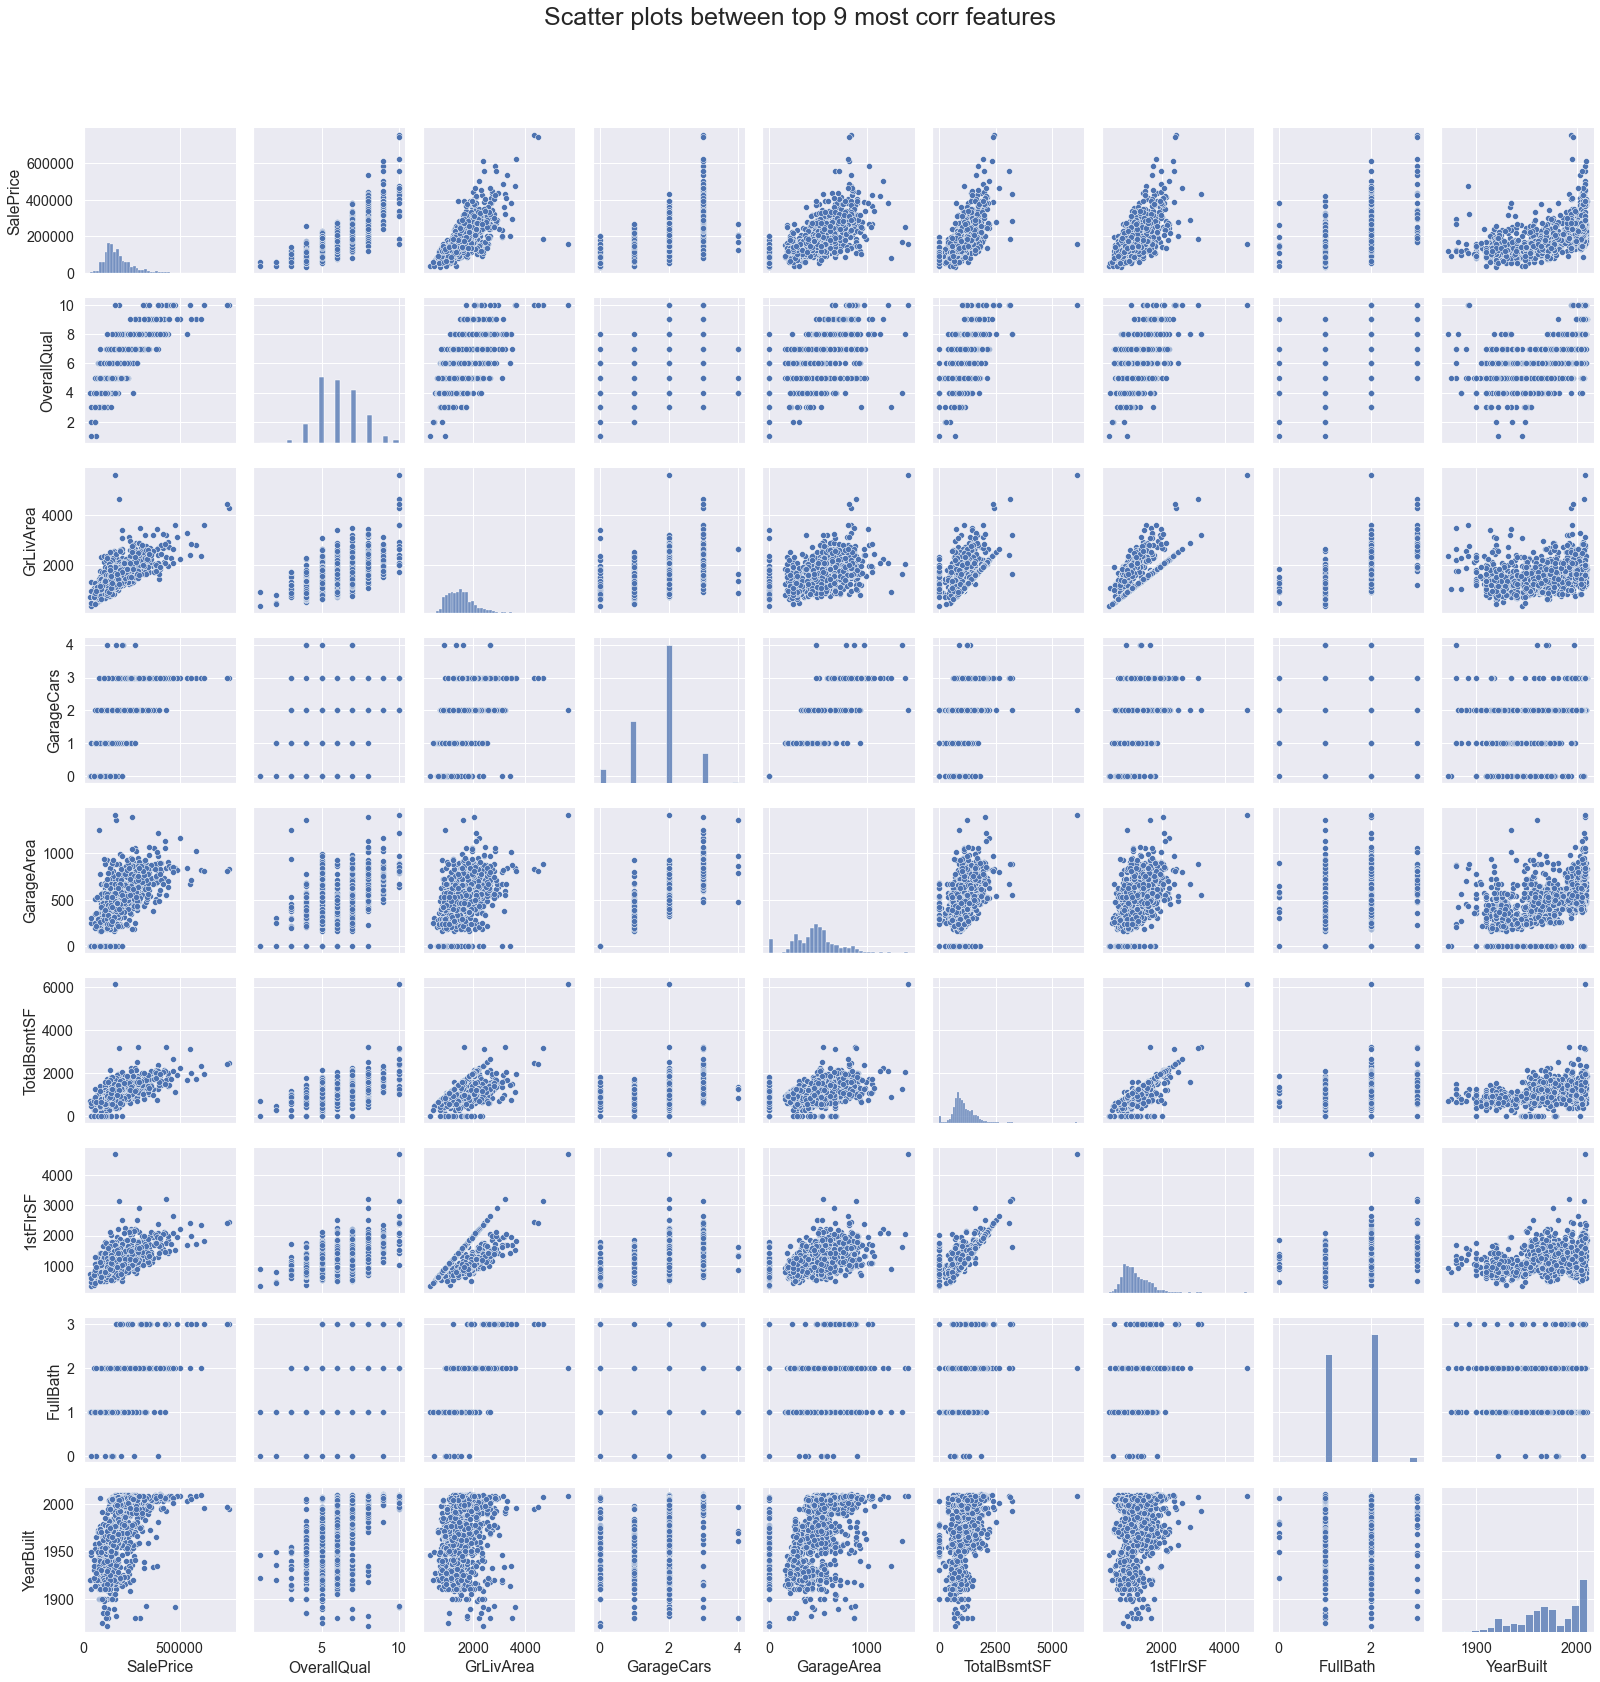

In [17]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

In [18]:
#drop id as it is not required for training or prediction
train_ID = train['Id']
test_ID = test['Id']

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

train.shape, test.shape

((1460, 80), (1459, 79))

In [19]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = train[a], y = train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 864x864 with 0 Axes>

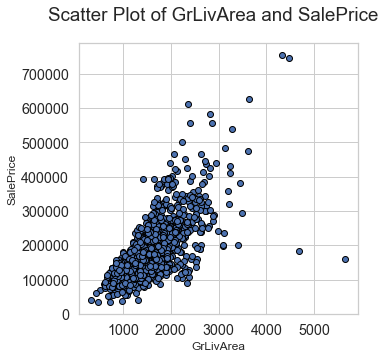

In [20]:
scatter_plot('GrLivArea')

- It can be observed that there are large outliers which can negatively affect the prediction of sale price highly
- So the outliers need to be deleted

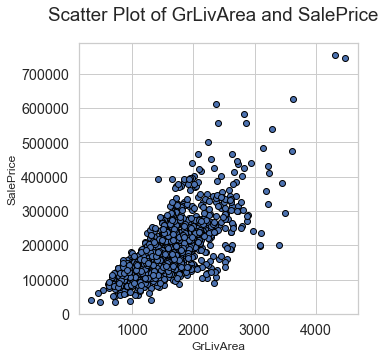

In [21]:
#Deleting outliers
train =  train.drop(train[(train['GrLivArea'] > 4000) & ( train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

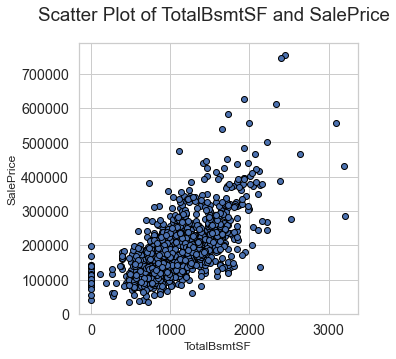

In [22]:
scatter_plot('TotalBsmtSF')


- There arent too large outliers, we do not need to delete any points

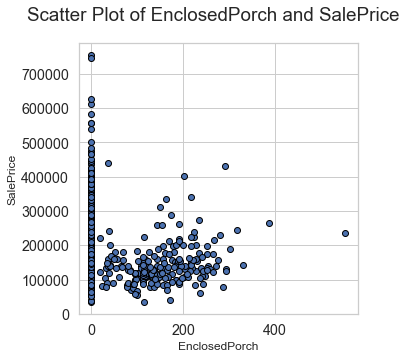

In [23]:
scatter_plot('EnclosedPorch')

- There is are some outliers that should be deleted so that it doesnt affect our predictions much

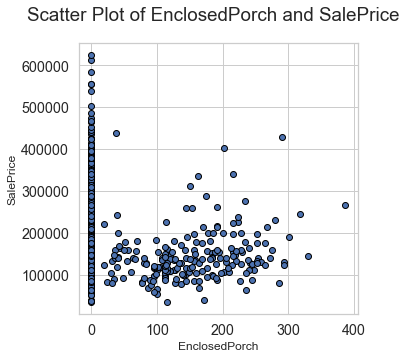

In [24]:
#Deleting outliers
train =  train.drop( train[( train['EnclosedPorch']>400)].index)

#Deleting outliers
train =  train.drop( train[( train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

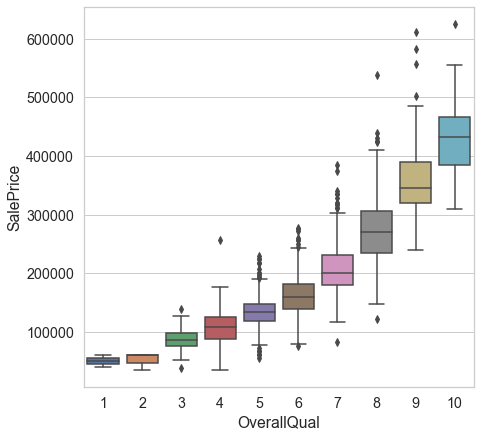

In [25]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
sns.boxplot(x = train['OverallQual'], y="SalePrice", data = data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

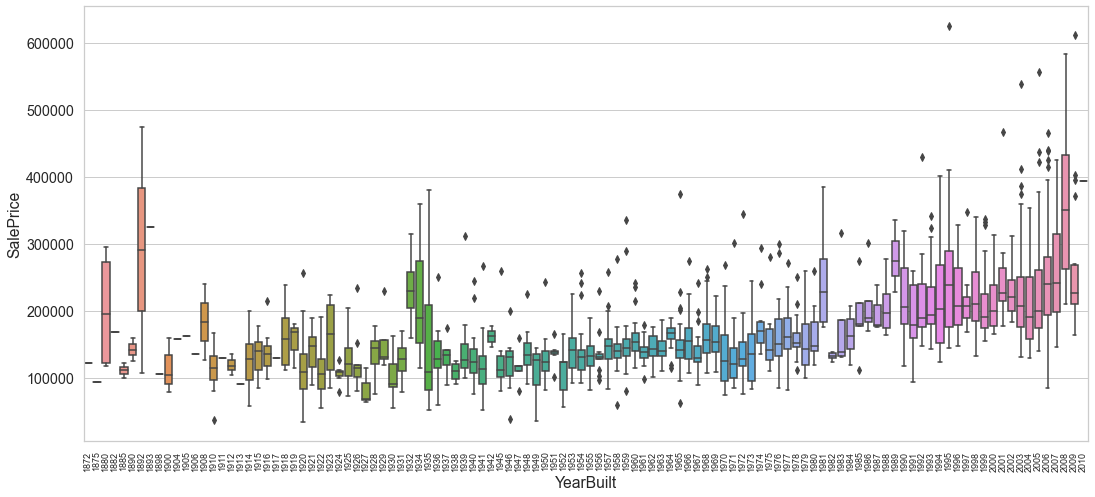

In [26]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
sns.boxplot(x= train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)


c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.567473
Kurtosis: 3.888317


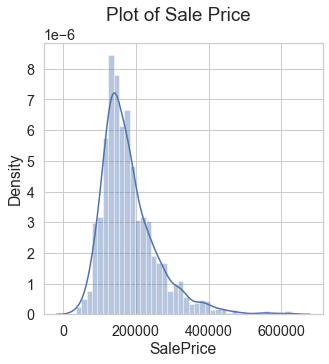

In [27]:
sns.distplot(train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


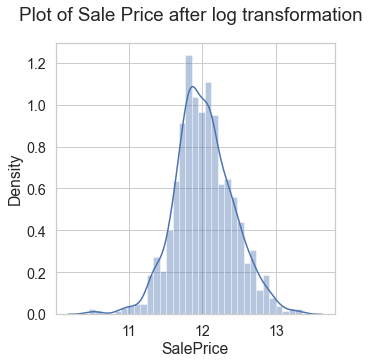

In [29]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

train['SalePrice'] = np.log(train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(train['SalePrice'])
plt.show()

In [30]:
train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [31]:
train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [32]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)                 # Total No of missing values
    percentage = (df.isnull().mean()).sort_values(ascending=False)*100     # % of Missing values
    No_unique_val = df.nunique()                                           # No of unique values
    
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Missing val', 'Percentage','Unique val'], sort = False)
    
    print(missing_data.head(n))

In [33]:
#training data    
missing_data(train,20)

              Missing val  Percentage  Unique val
PoolQC               1451   99.725086           2
MiscFeature          1401   96.288660           4
Alley                1364   93.745704           2
Fence                1176   80.824742           4
FireplaceQu           690   47.422680           5
LotFrontage           259   17.800687         109
GarageYrBlt            81    5.567010          97
GarageCond             81    5.567010           5
GarageType             81    5.567010           6
GarageFinish           81    5.567010           3
GarageQual             81    5.567010           5
BsmtExposure           38    2.611684           4
BsmtFinType2           38    2.611684           6
BsmtCond               37    2.542955           4
BsmtQual               37    2.542955           4
BsmtFinType1           37    2.542955           6
MasVnrArea              8    0.549828         324
MasVnrType              8    0.549828           4
Electrical              1    0.068729           5


In [34]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

- PoolQC,Alley have only two unique values
- PoolQC has 99.7% of missing data, which means most of the values are NA: No Pool ie most of the houses do not have a pool
- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values

In [35]:
#test data 
missing_data(test,34)

              Missing val  Percentage  Unique val
PoolQC               1456   99.794380           2
MiscFeature          1408   96.504455           3
Alley                1352   92.666210           2
Fence                1169   80.123372           4
FireplaceQu           730   50.034270           5
LotFrontage           227   15.558602         115
GarageYrBlt            78    5.346127          97
GarageFinish           78    5.346127           3
GarageQual             78    5.346127           4
GarageCond             78    5.346127           5
GarageType             76    5.209047           6
BsmtCond               45    3.084304           4
BsmtExposure           44    3.015764           4
BsmtQual               44    3.015764           4
BsmtFinType2           42    2.878684           6
BsmtFinType1           42    2.878684           6
MasVnrType             16    1.096642           4
MasVnrArea             15    1.028101         303
MSZoning                4    0.274160           5


In [36]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

- all records mostly "AllPub" for Utilities

- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values
- Utilities has only 1 unique value
- Utility will also be dropped

In [37]:
print(f"Null Value in training data: {train.isnull().sum().sum()}")   # calculate total number of null values in training data
print(f"Null Value in testing data: {test.isnull().sum().sum()}")     # calculate total number of null values in test data

Null Value in training data: 6950
Null Value in testing data: 7000


In [38]:
# save the 'SalePrice'column as train_label
train_label = train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
train = train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [39]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [40]:
train = missing(train)
test = missing(test)

In [41]:
print(f"Null Value in training data: {train.isnull().sum().sum()}")   # calculate total number of null values in training data

print(f"Null Value in testing data: {test.isnull().sum().sum()}")     # calculate total number of null values in test data

Null Value in training data: 0
Null Value in testing data: 0


In [42]:
train.shape,test.shape

((1455, 75), (1459, 75))

##### Feature Engineering


In [43]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [44]:
train = add_new_cols(train)
test = add_new_cols(test)

In [45]:
train.shape,test.shape

((1455, 80), (1459, 80))

In [46]:
g1 = train.columns.to_series().groupby(train.dtypes).groups

In [47]:
{k.name: v for k, v in g1.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'Total_SF', 'Total_Porch_SF',
        'Total_Square_Feet', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Total_Bathrooms'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCon

In [48]:
g2 = test.columns.to_series().groupby(test.dtypes).groups

In [49]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_SF', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQ

In [50]:
#get dummy values for categorical data
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(1455, 292)
(1459, 278)


In [51]:
train, test = train.align(test, join = 'inner', axis=1)

In [52]:
print(train.shape)
print(test.shape)

(1455, 278)
(1459, 278)


In [53]:
print(f"Null Value in training data: {train.isnull().sum().sum()}")   # calculate total number of null values in training data

print(f"Null Value in testing data: {test.isnull().sum().sum()}")     # calculate total number of null values in test data

Null Value in training data: 0
Null Value in testing data: 0


In [54]:
pd.set_option('display.max_columns', None)
train.head(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   Total_SF  Total_Bathrooms  Total_Porch_SF  Total_Square_Feet  \
0      2566              3.5              61               2416   
1      2524              2.5             298               2240   
2      2706              3.5              42               2272   
3      2473              2.0             307               1933   
4      3343              3.5             276               2853   

   Total_Quality  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0             12                 0            0            0            1   
1             14                 0            0            0            1   
2             12                 0            0            0            1   
3             12                 0            0            0            1   
4             13                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
0            0            0            1             0             0   
1            0            0            1             0             0   
2            0            0            1             1             0   
3            0            0            1             1             0   
4            0         

In [55]:
pd.set_option('display.max_columns', None)
test.head(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1961         0.0       468.0       144.0      270.0        882.0   
1          1958       108.0       923.0         0.0      406.0       1329.0   
2          1998         0.0       791.0         0.0      137.0        928.0   
3          1998        20.0       602.0         0.0      324.0        926.0   
4          1992         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   
3       926       678             0       1604           0.0           0.0   
4      1280         0             0       1280           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1961.0         1.0       730.0         140            0   
1       1958.0         1.0       312.0         393           36   
2       1997.0         2.0       482.0         212           34   
3       1998.0         2.0       470.0         360           36   
4       1992.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6    2010   
1              0          0            0         0    12500       6    2010   
2              0          0            0         0        0       3    2010   
3              0          0            0         0        0       6    2010   
4              0          0          144         0        0       1    2010   

   Total_SF  Total_Bathrooms  Total_Porch_SF  Total_Square_Feet  \
0    1778.0              1.0             260             1508.0   
1    2658.0              1.5             429             2252.0   
2    2557.0              2.5             246             2420.0   
3    2530.0              2.5             396             2206.0   
4    2560.0              2.0             226             1543.0   

   Total_Quality  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0             11                 0            0            1            0   
1             12                 0            0            0            1   
2             10                 0            0            0            1   
3             12                 0            0            0            1   
4             13                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
0            0            0            1             0             0   
1            0            0            1             1             0   
2            0            0            1             1             0   
3            0            0            1             1             0   
4            0         

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 814.2 KB


In [57]:
X_test = test           # testing features

In [58]:
train["SalePrice"] = train_label

In [59]:
train_set, valid_set = train_test_split(train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [60]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print()
print(f"X_test shape: {X_test.shape}")

X_train shape: (1018, 278)
y_train shape: (1018,)

X_valid shape: (437, 278)
y_valid shape: (437,)

X_test shape: (1459, 278)


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1020
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 569.6 KB


In [62]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1021 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 244.5 KB


In [63]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [64]:
y_valid

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [65]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [66]:
null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
5


- No null values in X_valid
- There are 5 null values in y_valid

In [67]:
np.where(np.isnan(y_valid))

(array([432, 433, 434, 435, 436], dtype=int64),)

In [68]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [69]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [70]:
y_valid.dtype

dtype('float64')

In [71]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 278) (437,)



#### Cross Validation


- done to avoid underfitting/overfitting of data and to get a better understanging of how good our models are performing
- split  data into k subsets, and train on k-1 of those subset,leaving one for testing
- performing 10-fold cross validation for each model#

In [72]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [73]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [74]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

####  Random Forest MODEL

- Random forest model is an ensemble method based on randomized decision trees. Grid search was used to select the best parameters with a 5-fold cross validation. The number of trees in the forest was set to 200 with a maximum depth of 5 and 3 minimum leaves. 

In [75]:
rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [76]:
# grid search to find best value of C, gamma and epsilon
param_grid  = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [5,7,9,11,13,15,17], 
               'min_samples_leaf': [3,5,7,9,11,13,15]}

# set cross validation to 5
clf = GridSearchCV(rforest, param_grid, cv = 5, n_jobs = -2)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=13, n_estimators=200,
                                             random_state=42),
             n_jobs=-2,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17],
                         'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [77]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 200}

In [78]:
rforest = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=3, random_state=42)

In [81]:
cross_validation(rforest)

Mean CV score:  0.403804172243945


In [93]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.3494772667130121


In [94]:
#predict value of sale price on the validation set
y_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y_pred_v, y_valid)

rmse:  0.38616747296757176


<Figure size 864x864 with 0 Axes>

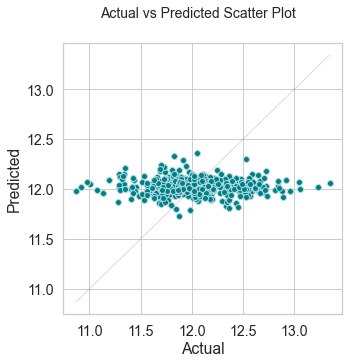

In [86]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

In [87]:
csv_path = "sample_submission.csv"
df_sub = pd.read_csv(csv_path, sep = ',')  

In [88]:
df_sub.shape

(1459, 2)

In [89]:
df_sub.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [90]:
X_test.shape

(1459, 278)

In [95]:
#predict value of sale price on the training set
y_final_pred = rforest.predict(X_test)

y_final_pred

array([11.98245395, 12.09692099, 12.06267362, ..., 12.09141096,
       11.89527417, 12.04678427])

In [96]:
#undo the log tranformation to get predictions in terms of original label
predictions = np.expm1(y_final_pred)
print(predictions)

[159922.99488121 179317.88754203 173280.6559392  ... 178332.55190172
 146571.31027874 170549.08158456]


In [97]:
submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = predictions
submit.to_csv('submission.csv',index=False)

In [98]:
submit

Id      SalePrice
0     1461  159922.994881
1     1462  179317.887542
2     1463  173280.655939
3     1464  167338.056592
4     1465  168246.417860
...    ...            ...
1454  2915  142093.744459
1455  2916  152451.041010
1456  2917  178332.551902
1457  2918  146571.310279
1458  2919  170549.081585

[1459 rows x 2 columns]